<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Actividad 4</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #f4f4f4;
        }
        header {
            background-color: green;
            color: #fff;
            text-align: center;
            padding: 20px 0;
        }
        main {
            max-width: 800px;
            margin: 20px auto;
            padding: 20px;
            background-color: #fff;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        h1 {
            margin: 0;
        }
        h2 {
            margin: 0;
            text-align: center;
        }
        h3 {
            margin: 0;
            text-align: center;
        }
        section {
            margin-bottom: 20px;
        }
        footer {
            text-align: center;
            padding: 10px 0;
            background-color: #007bff;
            color: #fff;
            position: fixed;
            bottom: 0;
            left: 0;
            width: 100%;
        }
    </style>
</head>
<body>
    <header>
        <h1>Actividad 4</h1>
    </header>
    <main>
        <section>
            <h2>Universidad Externado de Colombia</h2>
            <h3>Ciencia de Datos</h3>
            <h3>Métodos Numéricos</h3>
        </section>
    </main>
    <footer>
        <p>&copy; 2024 Universidad Externado de Colombia - Ciencia de Datos</p>
    </footer>
</body>
</html>


## Librerías

In [1]:
import numpy as np
import math
import plotly.express as px
import time
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.abc import x


## Funciones

In [51]:
def biseccion(a, b, tol, max_iter, funcion):
    """
    Cálcula el método de la bisección dados dos puntos en una función.
    """
    if funcion(a) * funcion(b) > 0:
        print("La función no cambia de signo en el intervalo dado.")
        return None

    iteracion = 0
    raices = []
    while (b - a) / 2 > tol:
        midpoint = (a + b) / 2
        raices.append(midpoint)

        if funcion(midpoint) == 0:return midpoint, raices
        elif funcion(a) * funcion(midpoint) < 0: b = midpoint
        else: a = midpoint

        #print(f"Iteración {iteracion + 1}: Raíz aproximada = {midpoint}")
        iteracion += 1
        if iteracion >= max_iter:
            print("Se alcanzó el número máximo de iteraciones.")
            break

    return (a + b) / 2, ["Iteración " + str(i) + " " + str(raices[i]) for i in range(len(raices))]

In [52]:
def secante(x0, x1, tol, max_iter, funcion):
    """
    calcula el método de la secante para dos elemetnos de una función.
    """
    iter_count = 0
    while iter_count < max_iter:
        x_next = x1 - funcion(x1) * (x1 - x0) / (funcion(x1) - funcion(x0))
        print(abs(x_next - x1))
        if abs(x_next - x1) < tol:
            return x_next
        x0, x1 = x1, x_next
        iter_count += 1
    print("El método de la secante no converge.")
    return None

In [53]:
def newton_raphson(fx, p0, tolerance=10**(-5)):
    diff = fx.diff(x)
    delta = float(fx.subs(x,p0)/diff.subs(x,p0))
    counter =  0
    tiempo = dict()
    while abs(delta) > tolerance:
        inicio = time.time()
        p0 = p0 - delta
        delta =  float(fx.subs(x,p0)/diff.subs(x,p0))
        counter += 1
        print(f"Iteration {counter}: p={p0}")
        final = time.time()
        tiempo[counter] = final-inicio
    return p0, tiempo

## Preguntas

### 1. Método de Bisección
Encuentre soluciones precisas dentro de $10^{-5}$ para las siguientes funciones:

Realice un esbozo de la gráfica junto conla iteración del método aplicado.

##### a) $x - 2^{-x} = 0$ para $[0, 1]$

In [63]:
print("La raiz es", biseccion(0, 1, -1e5, 1000, lambda x: x - (2**(-x)))[0])
print("El total de iteraciones es", len(biseccion(0, 1, -1e5, 1000, lambda x: x - (2**(-x)))[1]))

#Para ver cada iteración ejecutar biseccion(0, 1, -1e5, 1000, lambda x: x - (2**(-x)))[1]

La raiz es 0.641185744504986
El total de iteraciones es 52


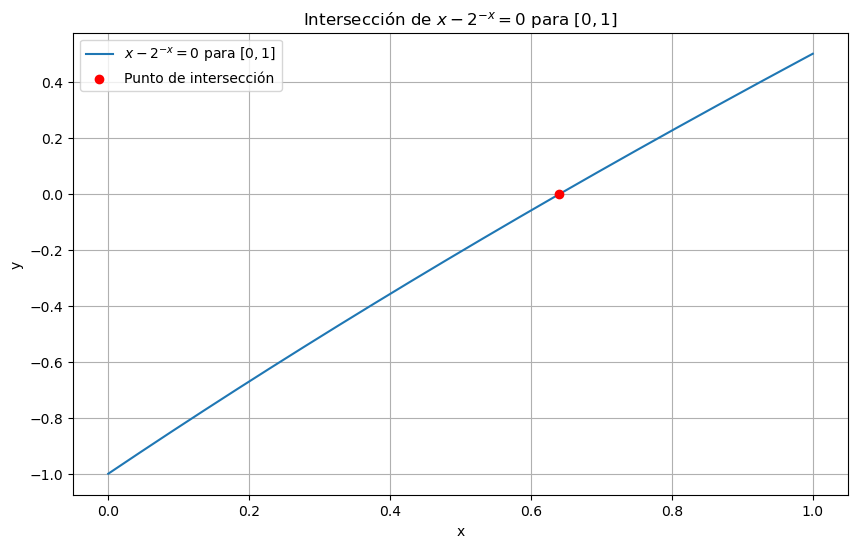

In [55]:
# Intervalo
x = np.linspace(0, 1, 400)
y1 = x - 2**(-x)
x_interseccion = 0.64
y_interseccion = x_interseccion - 2**(-x_interseccion)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='$x - 2^{-x} = 0$ para $[0, 1]$')
plt.scatter(x_interseccion, y_interseccion, color='red', zorder=5, label='Punto de intersección')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Intersección de $x - 2^{-x} = 0$ para $[0, 1]$')
plt.legend()
plt.grid(True)
plt.show()


##### b) $e^x - x^2 + 3x - 2 = 0$ para $[0, 1]$

In [57]:
print("La raiz es", biseccion(0, 1, -1e5, 100000, lambda x: np.exp(x) - x**2 + 3*x - 2)[0])
print("El total de iteraciones es", len(biseccion(0, 1, -1e5, 100000, lambda x: np.exp(x) - x**2 + 3*x - 2)[1]))

#Para ver cada iteración ejecutar biseccion(0, 1, -1e5, 100000, lambda x: np.exp(x) - x**2 + 3*x - 2)[1]

La raiz es 0.2575302854398608
El total de iteraciones es 53


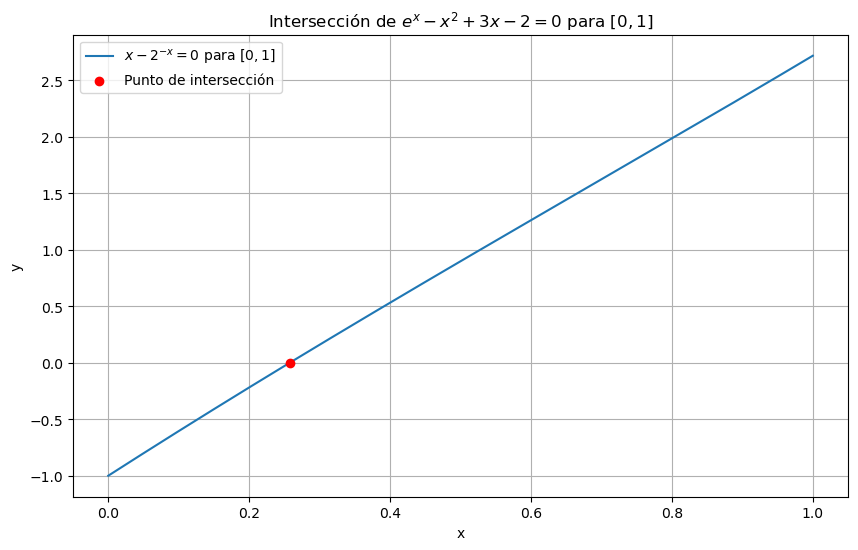

In [73]:
# Intervalo
x = np.linspace(0, 1, 400)
y1 = np.exp(x) - x**2 + 3*x - 2
x_interseccion = 1
y_interseccion = np.exp(0) - 0**2 + 3*0 - 2

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='$x - 2^{-x} = 0$ para $[0, 1]$')
plt.scatter(0.2575302854398608, 0, color='red', zorder=5, label='Punto de intersección')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Intersección de $e^x - x^2 + 3x - 2 = 0$ para $[0, 1]$')
plt.legend()
plt.grid(True)
plt.show()

##### c) $x \cos(x) - 2x^2 + 3x - 1 = 0$ para $[0.2, 0.3]$ y $[1.2, 1.3]$

In [65]:
## [0.2, 0.3]
print("La raiz es", biseccion(0.2, 0.3, -1e5, 1000, lambda x: x*math.cos(x) - (2*(x**2)) + (3*x) - 1)[0])
print("El total de iteraciones es", len(biseccion(0.2, 0.3, -1e5, 1000, lambda x: x*math.cos(x) - (2*(x**2)) + (3*x) - 1)[1]))
#Para ver cada iteración ejecutar biseccion(0.2, 0.3, -1e5, 1000, lambda x: x*math.cos(x) - (2*(x**2)) + (3*x) - 1)[0]

La raiz es 0.2975302336716439
El total de iteraciones es 46


In [69]:
## [1.2, 1.3]
biseccion(1.2, 1.3, -1e5, 1000, lambda x: x*math.cos(x) - (2*(x**2)) + (3*x) - 1)

print("La raiz es", biseccion(1.2, 1.3, -1e5, 2000, lambda x: x*math.cos(x) - (2*(x**2)) + (3*x) - 1)[0])
print("El total de iteraciones es", len(biseccion(1.2, 1.3, -1e5, 2000, lambda x: x*math.cos(x) - (2*(x**2)) + (3*x) - 1)[1]))
#Para ver cada iteración ejecutar biseccion(1.2, 1.3, -1e5, 1000, lambda x: x*math.cos(x) - (2*(x**2)) + (3*x) - 1)[0]

Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
La raiz es 1.2566233225055687
Se alcanzó el número máximo de iteraciones.
El total de iteraciones es 2000


En este caso le puse un límite de 2000 iteraciones, vale recalcar que toma muchas más iteraciones que todos los ejemplos de otros puntos.

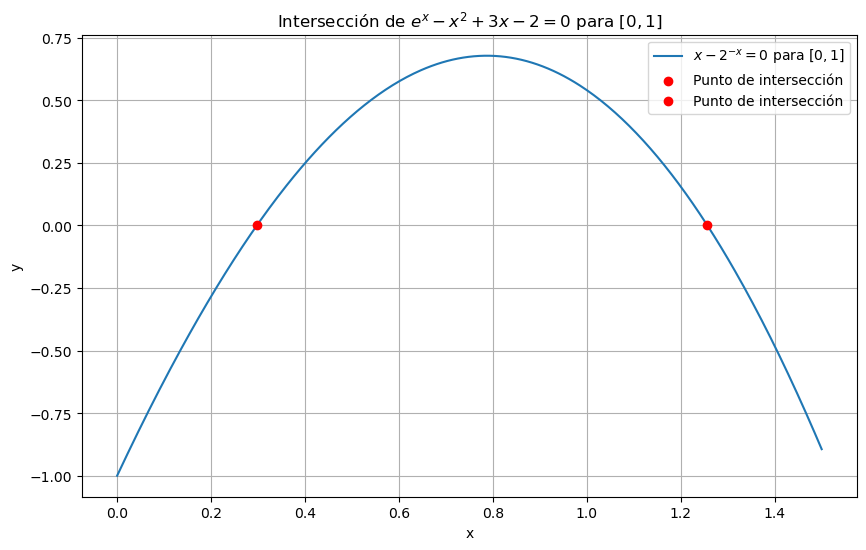

In [74]:
# Intervalo
x = np.linspace(0, 1.5, 400)
y1 = x * np.cos(x) - 2 * x**2 + 3 * x - 1
x_interseccion = 0.29
y_interseccion = np.exp(x_interseccion) - 2

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='$x - 2^{-x} = 0$ para $[0, 1]$')
plt.scatter(1.2566233225055687, 0, color='red', zorder=5, label='Punto de intersección')
plt.scatter(0.2975302336716439, 0, color='red', zorder=5, label='Punto de intersección')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Intersección de $e^x - x^2 + 3x - 2 = 0$ para $[0, 1]$')
plt.legend()
plt.grid(True)
plt.show()

### 2. Método de la Secante
Sea $f(x) = -x^3 - \cos(x)$. Con $p_0 = -1$ y $p_1 = 0$. Encuentre $P_4$ utilizando el método de la secante.

In [84]:
secante(-1, 0, 0.0001, 4, lambda x: -x**3 - np.cos(x))

0.6850733573260451
0.5670031315831837
0.44487095040313607
0.04057823092647639
El método de la secante no converge.


### 3. Método de Bisección
Realice el gráfico para $y = e^x - 2$ y $y = \cos(e^x - 2)$ y use el método de bisección para encontrar una aproximación dentro de $10^{-5}$ para $e^x - 2 = \cos(e^x - 2)$ en $[0.5, 1.5]$.

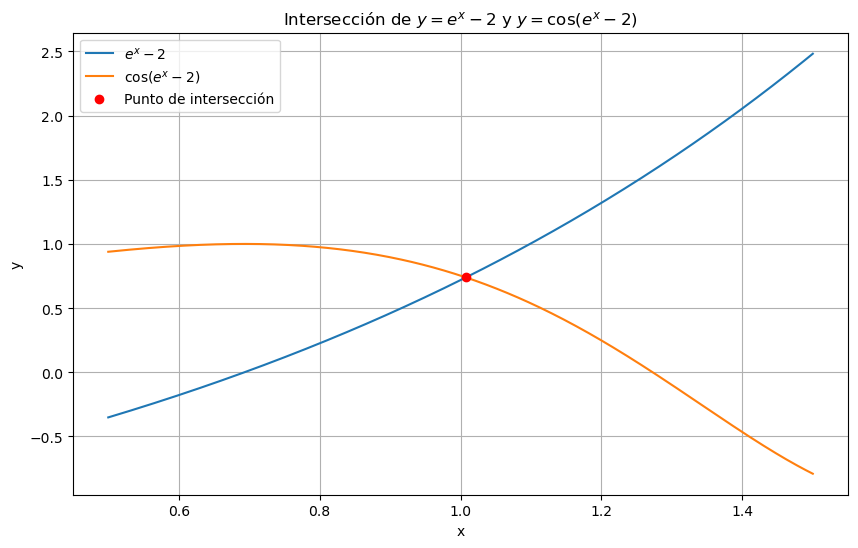

In [29]:
# Intervalo
x = np.linspace(0.5, 1.5, 400)
y1 = np.exp(x) - 2
y2 = np.cos(np.exp(x) - 2)

# Punto de intersección encontrado por el método de bisección
x_interseccion = 1.0076217651367188
y_interseccion = np.exp(x_interseccion) - 2

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='$e^x - 2$')
plt.plot(x, y2, label='$\cos(e^x - 2)$')
plt.scatter(x_interseccion, y_interseccion, color='red', zorder=5, label='Punto de intersección')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Intersección de $y = e^x - 2$ y $y = \cos(e^x - 2)$')
plt.legend()
plt.grid(True)
plt.show()


In [91]:
biseccion(0.5, 1.5, -1e5, 1000, lambda x: np.exp(x) - 2 - np.cos(np.exp(x) - 2))

print("La raiz es", biseccion(0.5, 1.5, -1e5, 1000, lambda x: np.exp(x) - 2 - np.cos(np.exp(x) - 2))[0])
print("El total de iteraciones es", len(biseccion(0.5, 1.5, -1e5, 1000, lambda x: np.exp(x) - 2 - np.cos(np.exp(x) - 2))[1]))
#Para ver cada iteración ejecutar biseccion(0.5, 1.5, -1e5, 1000, lambda x: np.exp(x) - 2 - np.cos(np.exp(x) - 2)[1]

Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
La raiz es 1.0076239716581368
Se alcanzó el número máximo de iteraciones.
El total de iteraciones es 1000


### 4. Polinomio de Cuarto Grado
El polinomio de cuarto grado: 

$f(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9$

In [94]:
x = sp.Symbol('x')
polinomio = 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9
funcion_polinomio = sp.lambdify(x, polinomio, 'numpy')

Tiene dos raíces reales, una en $[-1, 0]$ y otra en $[0, 1]$. Aproxime estos ceros con el método de la secante y de Newton-Raphson.

In [95]:
# Secante
raiz_secante_1 = secante(-1, 0, 1e-5, 100, funcion_polinomio)
raiz_secante_2 = secante(0, 1, 1e-5, 100, funcion_polinomio)

print("Raiz intervalo 1: " + str(raiz_secante_1) + " " +"Raiz intervalo 2: " + str(raiz_secante_2)) 

0.020361990950226245
0.02032926548501565
3.1993857550802196e-05
2.573803404432029e-08
0.75
0.5237627651217597
2.059180548642682
1.8800133039238074
0.1999544157194897
1.0639592402349811
0.7190325331676581
0.07046854843988878
0.019981182072561873
7.610465317205856e-05
6.007236556804241e-08
Raiz intervalo 1: -0.040659288315725135 Raiz intervalo 2: -0.04065928831557162


In [96]:
# Newton-Raphson
raiz_newton_1 = newton_raphson(polinomio, -0.5)
raiz_newton_2 = newton_raphson(polinomio, 0.5)

print("Raiz intervalo 1: " + str(raiz_newton_1[0]) + " "+"Raiz intervalo 2: " + str(raiz_newton_2[0])) 

Iteration 1: p=-0.15045248868778283
Iteration 2: p=-0.04181681394887035
Iteration 3: p=-0.04065934349732934
Iteration 1: p=-0.7050898203592815
Iteration 2: p=-0.3237911142304748
Iteration 3: p=-0.06460313103057491
Iteration 4: p=-0.04068615115195558
Iteration 5: p=-0.04065928834533494
Raiz intervalo 1: -0.04065934349732934 Raiz intervalo 2: -0.04065928834533494


### 5. Método de Newton-Raphson
Existen dos soluciones positivas $x_1$ y $x_2$ para la ecuación $4x^2 - e^x - e^{-x} = 0$. A partir del método de Newton-Raphson, aproxime la solución dentro de 0.00001 de acuerdo con los siguientes valores de $p_0$:

- $p_0 = -10$
- $p_0 = 3$
- $p_0 = 10$
- $p_0 = -3$


In [97]:
ecuacion = 4*x**2 - sp.exp(x) - sp.exp(-x)
valores_iniciales = [-10, 3, 10, -3]

# Aplicando el método de Newton-Raphson para cada valor inicial
resultados = [newton_raphson(ecuacion, p0)[0] for p0 in valores_iniciales]


Iteration 1: p=-9.014580931292265
Iteration 2: p=-8.045615815566453
Iteration 3: p=-7.109287266381521
Iteration 4: p=-6.233851650373769
Iteration 5: p=-5.46342800091177
Iteration 6: p=-4.857200183343614
Iteration 7: p=-4.4752136496118755
Iteration 8: p=-4.326856732857093
Iteration 9: p=-4.306592777827722
Iteration 10: p=-4.306245374138223
Iteration 1: p=-1.0019361613022868
Iteration 2: p=-0.8385205483091718
Iteration 3: p=-0.8246057692142938
Iteration 4: p=-0.8244985916713463
Iteration 1: p=9.014580931292265
Iteration 2: p=8.045615815566453
Iteration 3: p=7.109287266381521
Iteration 4: p=6.233851650373769
Iteration 5: p=5.463428000911769
Iteration 6: p=4.857200183343614
Iteration 7: p=4.4752136496118755
Iteration 8: p=4.326856732857093
Iteration 9: p=4.306592777827722
Iteration 10: p=4.306245374138223
Iteration 1: p=1.0019361613022868
Iteration 2: p=0.8385205483091718
Iteration 3: p=0.8246057692142938
Iteration 4: p=0.8244985916713463


In [98]:
for i in range(len(resultados)):
    print("Para el punto de: " + str(valores_iniciales[i]) + " " + "Su raiz es" + str(resultados[i]))

Para el punto de: -10 Su raiz es-4.306245374138223
Para el punto de: 3 Su raiz es-0.8244985916713463
Para el punto de: 10 Su raiz es4.306245374138223
Para el punto de: -3 Su raiz es0.8244985916713463


### 6. Ecuación de Anualidad Ordinaria
La ecuación de anualidad ordinaria está dada por:

$A = \frac{P[1 - (1 + i)^{-n}]}{i}$

Donde $A$ es la cantidad de la hipoteca, $P$ es la cantidad de cada pago, $i$ es la tasa de interés por periodo para los $n$ periodos de pago. Suponga que se necesita una hipoteca por 540.000.000 COP a 30 años para una vivienda en la Candelaria y que la persona que solicita el préstamo puede realizar pagos de máximo 4.000.000 por mes. ¿Cuál es la tasa de interés máxima que la persona puede asumir?

In [36]:
ecuacion = (4000000 * (1 - (1 + i)**-360) / i) - 540000000

In [37]:
x = sp.symbols('x')
(4000000 * (1 - (1 + x)**-360) / x) - 540000000

-540000000 + (4000000 - 4000000/(x + 1)**360)/x

In [38]:
newton_raphson((4000000 * (1 - (1 + x)**-360) / x) - 540000000, 0.004166666666666667)[0]

Iteration 1: p=0.006181723718868301
Iteration 2: p=0.0067204267428665415
Iteration 3: p=0.0067498363190608155


0.0067498363190608155

La tasa máxima encontrada es de alrededor de 0.00674, truncado a 5 dígitos mensuales siguiendo método de netwon rahpson.

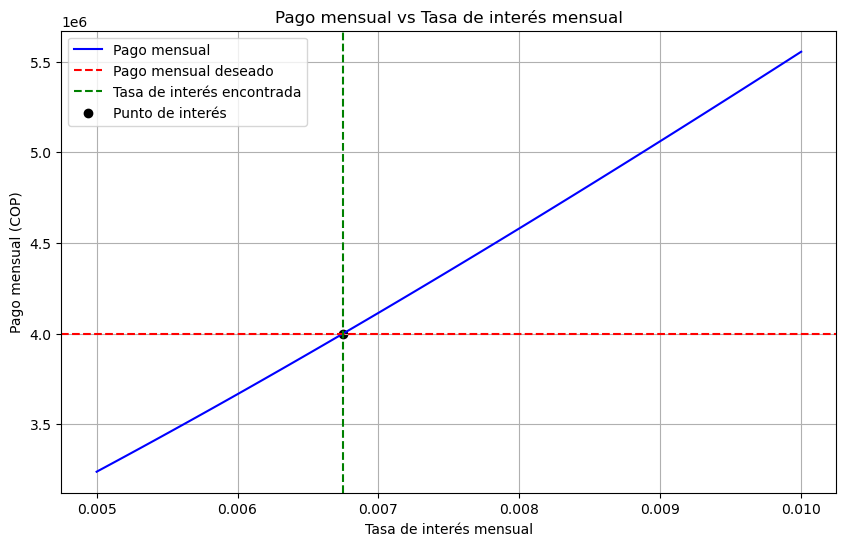

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def pagoMes(tasa_interes):
    A = 540000000  # Plata
    n = 30 * 12  # Plazo (30 años * 12 meses)
    return A * tasa_interes / (1 - (1 + tasa_interes)**-n)

# Tasa de interés encontrada
tasa_interes_encontrada = 0.0067498363190608155
pago_mensual_deseado = 4000000
tasas_interes = np.linspace(0.005, 0.01, 100)

pagos_mensuales = [pagoMes(tasa) for tasa in tasas_interes]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(tasas_interes, pagos_mensuales, color='blue', label='Pago mensual')
plt.axhline(y=pago_mensual_deseado, color='red', linestyle='--', label='Pago mensual deseado')
plt.axvline(x=tasa_interes_encontrada, color='green', linestyle='--', label='Tasa de interés encontrada')
plt.scatter(tasa_interes_encontrada, pago_mensual_deseado, color='black', label='Punto de interés')
plt.title('Pago mensual vs Tasa de interés mensual')
plt.xlabel('Tasa de interés mensual')
plt.ylabel('Pago mensual (COP)')
plt.legend()
plt.grid(True)
plt.show()
